In [13]:
import numpy as np


np.random.seed(42)


In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [15]:
dataset = fetch_california_housing()


In [16]:
x = dataset.data[:, :]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [17]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"R2-Score: {r2_score}")


R2-Score: 0.5957702326061662


### Non-linear Transformation:

$\vec{x} =\left(\!
\begin{array}{c}
x_1 \\
x_2
\end{array}
\!\right) $ Wir haben Datenpunkte mit z.B. 2 Features.

$\vec{z} = \phi(\vec{x})$ Wir wollen dann eine Transformation mit dem Grad=2 ausführen.

$\vec{z} =\left(\!
\begin{array}{c}
z_1 \\
\vdots \\
z_9
\end{array}
\!\right) $ Daraus resultierenden dann (in dem Beispiel) 6 Features.


In [18]:
from sklearn.preprocessing import PolynomialFeatures


degree = 2
pf = PolynomialFeatures(degree=degree)
pf.fit(x_train)

x_train_transformed = pf.transform(x_train)
x_test_transformed = pf.transform(x_test)


In [19]:
print(x_train.shape, x_train_transformed.shape)
print(x_test.shape, x_test_transformed.shape)


(14448, 8) (14448, 45)
(6192, 8) (6192, 45)


In [20]:
print(f"New num features: {pf.n_output_features_}")
print("Old feature names: [x0, x1]")


New num features: 45
Old feature names: [x0, x1]


#### Polynomial Regression:

$\vec{y} = \mathbf{Z}\vec{\beta} + \vec{\epsilon}$  
$\mathbf{Z}$ ist hier dann der Datensatz nach der Transformation.


In [21]:
poly_regr = LinearRegression()
poly_regr.fit(x_train_transformed, y_train)
r2_score = poly_regr.score(x_test_transformed, y_test)

print(f"R2-Score: {r2_score}")


R2-Score: 0.6533650029325858


#### Visualization


In [22]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()


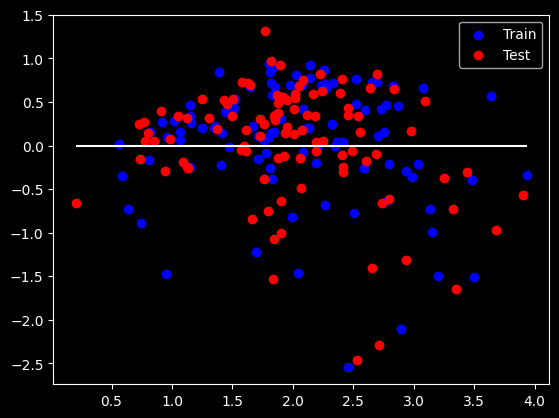

In [23]:
plot_residuals(regr, x_train[:100], y_train[:100], x_test[:100], y_test[:100])


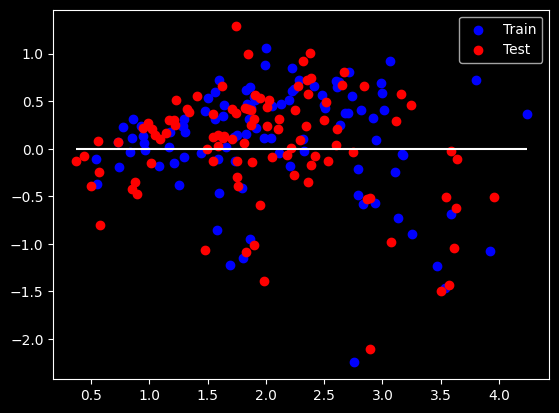

In [24]:
plot_residuals(
    poly_regr,
    x_train_transformed[:100],
    y_train[:100],
    x_test_transformed[:100],
    y_test[:100],
)
